# Predict

1. Используемый датасет: GTZAN dataset.  
http://marsyasweb.appspot.com/download/data_sets/
2. Используемый алгоритм для экстракции фич: mfcc - более подробно в комментариях  
Библиотека: python_speech_features 

---

**Что еще нужно?  **
  - Бороться с переобучением

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from copy import copy

import python_speech_features as psf
import sunau
import librosa as lb

from sklearn.preprocessing import LabelEncoder

In [6]:
#Проверим загружаемость
audio_files_load = pd.read_csv('dataset.csv',index_col=0, sep=",", dtype=object)
audio_files_load

,genre,file_name,samplerate,duration,mean,std,max,min,diff_mean,diff_std
0,blues,blues.00000.au,22050,30,[ -1.50538264 -1.66745918 -15.21220703 4.23...,[ 1.14202743 6.01268043 8.70403617 9.26...,[ 1.01400399 13.70942565 11.68709764 29.98...,[ -4.85854815 -26.57615926 -42.66757796 -28.61...,[ -1.62076547e-01 -1.35447478e+01 1.9444190...,[ 6.11997806 12.51046351 11.42995379 11.04...
1,blues,blues.00001.au,22050,30,[ -3.27341626e+00 8.52053789e-01 -2.8907873...,[ 2.1263558 8.1618835 12.70405381 12.34...,[ 1.23421579 24.11494854 25.19993601 36.74...,[ -9.67297876 -32.81133142 -51.11621653 -34.84...,[ 4.12547005 -3.74284114 7.23281575 -11.75...,[ 9.13983632 16.90063541 17.14793627 13.05...
2,blues,blues.00002.au,22050,30,[ -9.43213843e-01 3.49022076e+00 -1.8450147...,[ 1.30325969 7.3102339 9.75454936 9.58...,[ 1.94451093 30.92381031 17.56145658 42.21...,[ -7.1497022 -42.67495042 -47.42781209 -27.95...,[ 4.43343461e+00 -2.19403685e+01 1.8106328...,[ 7.93639193 12.67006977 11.11101465 14.64...
3,blues,blues.00003.au,22050,30,[ -3.39170231 9.25209884 -4.38120259 4.95...,[ 1.56811584 7.69374057 8.64939629 8.37...,[ 0.50526175 35.59888198 17.72606136 30.46...,[ -7.70663011 -21.78396563 -39.60813859 -23.36...,[ 12.64380114 -13.63330142 9.33408447 -13.09...,[ 8.32276957 12.48046539 10.38500642 11.23...
4,blues,blues.00004.au,22050,30,[ -1.96142936 0.93701381 -23.26517463 -1.32...,[ 1.88318814 9.51916117 8.22781382 9.36...,[ 2.68423869 22.249557 1.29087329 38.57...,[ -7.535371 -41.6089841 -48.90922228 -25.54...,[ 2.89844317 -24.20218844 21.94310662 -28.03...,[ 10.80234986 11.22449014 13.26978398 14.48...
5,blues,blues.00005.au,22050,30,[ -2.13538871e+00 2.49841696e+00 -1.5173896...,[ 2.25315092 14.84154267 9.90401463 13.59...,[ 3.47138862 28.17259348 19.8527738 54.43...,[ -9.04380414 -49.37085582 -38.34012376 -27.59...,[ 4.63380566e+00 -1.76723130e+01 1.9613831...,[ 16.31270029 18.18994887 15.27220357 15.75...
6,blues,blues.00006.au,22050,30,[ -2.11225679e+00 1.16528963e+01 -2.3602408...,[ 2.72318955 13.40692334 13.2523132 12.91...,[ 2.61813792 36.94733324 13.85641005 52.86...,[ -9.94682459 -38.51996341 -57.14388972 -25.54...,[ 1.37651531e+01 -3.52553045e+01 2.9949698...,[ 14.76822598 18.59751124 16.45676792 26.70...
7,blues,blues.00007.au,22050,30,[ -2.247435 7.78380454 -17.76835974 10.48...,[ 2.00717232 11.65265969 9.51996303 11.90...,[ 2.99191514 35.65089431 13.80784292 48.93...,[ -8.64027198 -43.22825191 -40.72101698 -19.46...,[ 10.03123954 -25.55216428 28.24869893 -16.54...,[ 12.66031083 14.91058721 13.48389568 18.47...
8,blues,blues.00008.au,22050,30,[ -1.55594314 -1.90990755 -11.38929456 8.59...,[ 1.09042461 6.6980525 9.92288305 11.06...,[ 0.95790908 14.38290344 9.51101863 50.40...,[ -4.98870974 -31.22306622 -47.387254 -19.01...,[ -0.35396441 -9.47938701 19.9841269 -15.15...,[ 6.94523319 15.00788849 10.85616022 15.11...
9,blues,blues.00009.au,22050,30,[ -3.07371572e+00 -3.31702137e-01 -1.2556826...,[ 2.346827 7.72442004 11.50908304 11.84...,[ 2.44348114 20.08284787 12.96071091 58.16...,[ -7.20556381 -46.29555427 -43.11173933 -20.41...,[ 2.74201358 -12.2251245 19.50174608 -32.45...,[ 8.17247535 15.69222587 16.59228327 17.83...


In [9]:
audio_files_load.iloc[0, 4]

'[ -1.50538264  -1.66745918 -15.21220703   4.23198313  -9.58464693\n   2.58241955 -18.42872884   6.35673123 -14.76404361   7.11813274\n  -7.61231446   7.73238963  -4.81976457   3.36533101  -5.88293318\n  -1.61010153  -2.58018652   0.83373388  -2.6204491    1.02039765\n  -1.43262021  -0.11374151  -0.09444546  -0.09804753   0.28404624\n  -0.70090855]'

In [16]:
# Процессинг датасета
def StringToList(string):
    string = string.replace("\n", "")
    string = string[1:-1] # Убираем квадратные скобки

    result = list()
    for s in string.split(" "):
        if s == "":
            continue
        else:
            result.append(float(s))

    return result

In [18]:
audio_files_load.iloc[:, 4:10] = audio_files_load.iloc[:, 4:10].applymap(StringToList)

In [74]:
def prepare_data(data):
    X = data.iloc[:,[4,5,6,7]].values
    y = data.iloc[:,0]
    
    res = list()
    for x in X:
        res_prep = list()
        for element in x:
            res_prep += element
        res.append(res_prep)
    X = np.array(res, dtype=np.float32)
    
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return X, y

In [87]:
X, y = prepare_data(audio_files_load)

np.random.seed(222)
random_idx = range(X.shape[0])
np.random.shuffle(random_idx)
X = X[random_idx]
y = y[random_idx]
print y

[9 3 4 6 8 7 5 1 6 1 1 6 9 5 7 0 4 0 7 1 3 4 1 3 7 7 1 8 4 4 8 5 5 6 9 6 9
 0 5 2 4 8 9 1 3 0 1 4 2 2 5 3 7 6 0 2 8 5 5 1 5 0 0 3 5 3 9 1 3 4 0 8 3 9
 8 5 2 7 9 4 9 6 3 2 0 9 2 9 5 2 6 7 0 4 2 8 4 6 7 2 6 3 9 8 6 4 3 8 6 3 8
 2 4 8 9 2 4 7 7 2 1 0 3 2 4 3 7 8 9 6 8 9 0 8 1 4 7 2 8 0 2 0 0 9 8 3 9 1
 9 3 2 1 5 1 6 0 8 2 5 3 6 0 1 2 2 4 6 1 4 1 6 7 8 0 2 9 4 2 0 3 7 3 1 1 8
 6 6 7 8 4 4 6 9 1 2 1 8 9 4 3 7 8 7 6 9 9 9 3 4 9 6 1 2 8 8 3 3 9 6 0 5 2
 3 2 4 2 5 7 5 0 7 9 8 1 0 9 0 6 6 9 0 2 0 4 2 8 8 5 7 9 4 0 9 4 9 8 7 0 5
 9 2 0 7 2 7 9 7 6 6 8 8 9 7 1 7 8 0 5 2 6 6 7 0 0 9 4 3 3 7 8 8 6 5 6 2 1
 5 5 1 0 3 5 6 7 9 7 1 0 8 2 9 6 4 6 1 6 4 5 3 1 2 2 7 5 9 3 3 0 6 1 8 8 4
 9 5 1 8 6 5 5 0 6 3 5 2 0 8 3 3 6 4 3 9 1 1 4 9 6 9 4 8 3 9 0 9 4 9 9 1 4
 3 7 1 4 0 2 8 3 7 6 0 3 1 1 0 5 5 3 0 7 7 7 8 6 7 9 2 9 8 8 1 6 9 1 1 8 3
 6 3 4 8 9 0 3 5 9 2 4 8 0 5 1 2 6 2 6 6 4 8 9 7 8 7 2 5 2 1 0 3 2 5 2 2 9
 3 7 1 7 8 6 1 5 7 2 5 3 2 7 9 4 0 7 3 1 7 9 5 8 2 2 8 3 4 4 2 6 9 6 8 2 4
 2 9 8 2 7 6 9 9 7 1 5 4 

** SVM **

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score

In [150]:
def select_model(x, y):
    best_accuracy = 0
    best_model = None
    
    model = SVC()
    param_grid = [{'C':[1, 10, 100, 1000],
                  'kernel':['linear']},
                  {'C':[1, 10, 100, 1000],
                  'kernel':['poly'],
                  'degree':[2,3,4]},
                  {'C':[1, 10, 100, 1000],
                  'kernel':['rbf'],
                  'degree':[2,3,4],
                  'gamma':['auto']}]

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=0)
    grid.fit(x,y)
    
    #print cross_val_score(model, x, y, scoring='accuracy')
    #accuracy = np.mean(cross_val_score(model, x, y, scoring='accuracy'))

    best_model = grid.best_estimator_
    best_accuracy = grid.best_score_
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model, grid

In [151]:
model, grid = select_model(X, y)

Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.675000


In [152]:
grid.grid_scores_

[mean: 0.65700, std: 0.02759, params: {'kernel': 'linear', 'C': 1},
 mean: 0.65700, std: 0.02759, params: {'kernel': 'linear', 'C': 10},
 mean: 0.65700, std: 0.02759, params: {'kernel': 'linear', 'C': 100},
 mean: 0.65700, std: 0.02759, params: {'kernel': 'linear', 'C': 1000},
 mean: 0.67500, std: 0.04319, params: {'kernel': 'poly', 'C': 1, 'degree': 2},
 mean: 0.67300, std: 0.04051, params: {'kernel': 'poly', 'C': 1, 'degree': 3},
 mean: 0.67100, std: 0.03618, params: {'kernel': 'poly', 'C': 1, 'degree': 4},
 mean: 0.67500, std: 0.04319, params: {'kernel': 'poly', 'C': 10, 'degree': 2},
 mean: 0.67300, std: 0.04051, params: {'kernel': 'poly', 'C': 10, 'degree': 3},
 mean: 0.67100, std: 0.03618, params: {'kernel': 'poly', 'C': 10, 'degree': 4},
 mean: 0.67500, std: 0.04319, params: {'kernel': 'poly', 'C': 100, 'degree': 2},
 mean: 0.67300, std: 0.04051, params: {'kernel': 'poly', 'C': 100, 'degree': 3},
 mean: 0.67100, std: 0.03618, params: {'kernel': 'poly', 'C': 100, 'degree': 4},
 m

In [153]:
y_hat = model.predict(X)
print sum(y_hat-y != 0) #Переобучился?

1


In [154]:
test_model = SVC(kernel='rbf', C=1, gamma='auto', degree=2)
test_model.fit(X, y)
y_hat_test = model.predict(X)
print sum(y_hat_test-y != 0)

1


In [155]:
random_sample = np.random.choice(100, 100, replace=False)

X_train = np.delete(X, random_sample, 0)
X_test = [X[i] for i in random_sample]
X_test = np.array(X_test)

y_train = np.delete(y, random_sample)
y_test = [y[i] for i in random_sample]
y_test = np.array(y_test)

In [156]:
X_train.shape

(900L, 104L)

In [157]:
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
y_hat_test = model.predict(X_test)

In [159]:
print y_hat_test
print y_test

[3 7 3 5 5 5 5 4 6 9 8 9 6 6 1 9 4 5 2 0 4 7 7 7 0 6 8 0 7 0 0 4 5 4 1 0 0
 3 0 8 2 9 4 1 0 1 9 9 2 5 9 4 6 6 5 7 1 1 0 3 1 7 4 3 3 7 9 5 3 9 0 9 6 3
 8 5 6 8 5 2 3 4 5 7 2 2 3 1 0 5 0 5 6 9 2 0 2 1 1 3]
[9 7 3 5 5 8 5 4 6 3 8 9 6 6 1 9 4 1 2 0 4 7 4 9 2 6 8 4 7 2 9 4 5 4 1 5 0
 9 0 8 5 2 8 1 3 1 3 6 2 5 9 8 0 6 0 7 1 5 0 3 5 7 8 3 3 7 3 5 3 2 0 9 6 3
 2 1 6 4 5 2 7 4 5 4 8 2 7 1 0 1 4 0 6 9 2 0 7 9 1 9]


In [160]:
accuracy_score(y_test, y_hat_test)

0.60999999999999999

In [161]:
cross_val_score(model, X, y, cv=10) #Подобранные параметры

array([ 0.58,  0.65,  0.72,  0.65,  0.68,  0.68,  0.69,  0.66,  0.69,  0.75])

In [162]:
cross_val_score(test_model, X, y, cv=10) #"Чистый" SVM, без подбора параметров

array([ 0.2 ,  0.15,  0.23,  0.16,  0.19,  0.22,  0.22,  0.2 ,  0.21,  0.19])

In [163]:
X_train.shape

(900L, 104L)

** PCA **

In [164]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

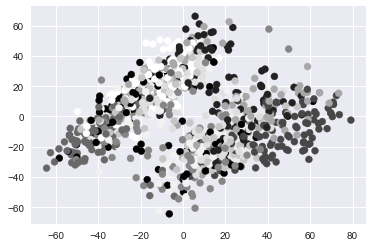

In [169]:
dec = PCA(n_components=2)
dec.fit(X)
vis = dec.fit_transform(X)
plt.scatter(vis[:,0], vis[:,1], c=y)

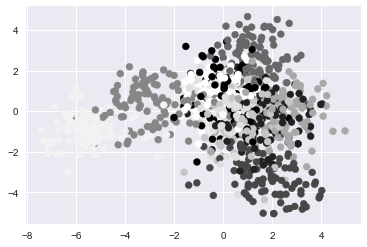

In [172]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
ld = lda.fit_transform(X, y)
plt.scatter(ld[:,0], ld[:,1], c=y)